# Gelatin Penetration

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with ND2Reader('z-stack movie resonant carvacrol gelatin nile red.nd2') as img:
    for attr in ['z_levels', 'frames']:
        print('{:>25}: {}'.format(attr, len(img.metadata[attr])))
    print('{:>25}: {}'.format('# time steps', len(img.get_timesteps())))
    print('{:>25}: {}'.format('time steps per frame',
                              len(img.get_timesteps()) // len(img.metadata['frames'])))

                 z_levels: 18
                   frames: 394
             # time steps: 7092
     time steps per frame: 18


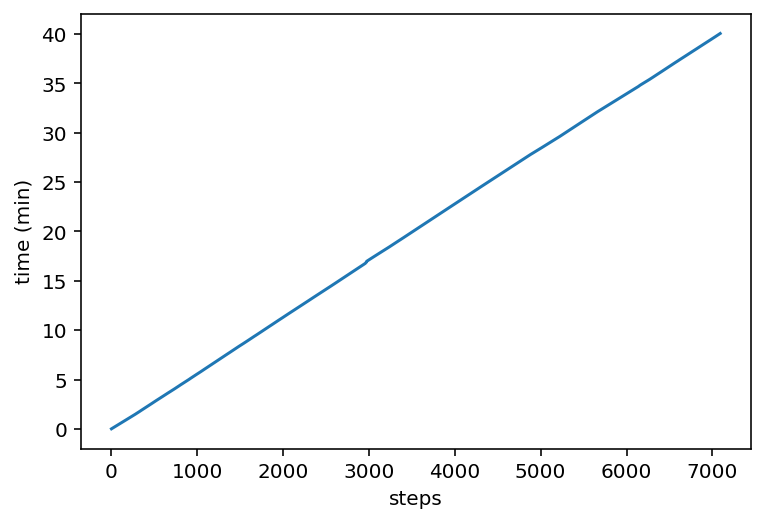

In [4]:
with ND2Reader('z-stack movie resonant carvacrol gelatin nile red.nd2') as img:
    timesteps = img.get_timesteps() / 1000 / 60   # in minutes
    plt.plot(timesteps)
    plt.xlabel('steps')
    plt.ylabel('time (min)')

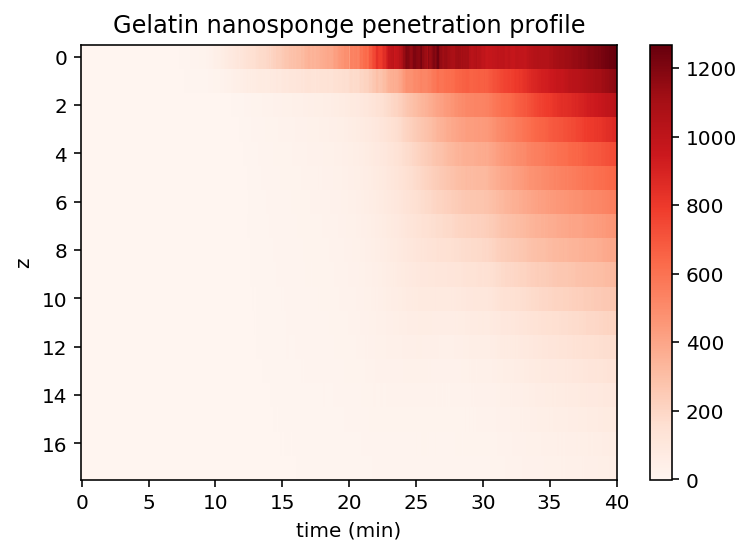

In [5]:
with ND2Reader('z-stack movie resonant carvacrol gelatin nile red.nd2') as img:

    img.bundle_axes = 'zyx'
    img.iter_axes = 't'

    # print(img.sizes)
    # print(img.iter_axes)
    
    img.default_coords['c'] = 1 #c = 1 ('TRITC')
    
    nz = len(img.metadata['z_levels'])
    nt = len(img.metadata['frames'])
    
    array = np.zeros((nz, nt))
    array_bg = np.zeros((nz, 1))

    cmp = np.empty((nt, nz))
    for t in range(nt):
        cmp[t] = img[t].mean(axis=(1, 2))
    cmp -= cmp[0]
    
    img.bundle_axes = 'yx'
    img.iter_axes = 'z'
    
    img.default_coords['t'] = 0
    
    for z in range(nz):
        img_copy = img[z]
        array_bg[z, 0] = img_copy.mean()
        
    for t in range(nt):
        img.default_coords['t'] = t
        for z in range(nz):
            img_copy = img[z]
            img_value = img_copy - array_bg[z, 0]
            array[z, t] = img_value.mean()

    # print(np.allclose(array, cmp.T))
    
    plt.imshow(array, plt.cm.Reds, aspect='auto')
    plt.colorbar()
    plt.xlabel('time (min)')
    plt.ylabel('z')
    plt.title('Gelatin nanosponge penetration profile')
    t_ticks = np.arange(0, timesteps[-1], 5, dtype=int)
    plt.xticks(t_ticks / (timesteps[-1] / nt), t_ticks)
    plt.show()  

# Export to an .xlsx using pandas

In [6]:
import pandas as pd

## convert your array into a dataframe
df = pd.DataFrame (array)

## save to xlsx file

filepath = 'Gelatin nile red penetration.xlsx'

df.to_excel(filepath, index=False)